In [2]:
import numpy as np
import matplotlib.pyplot as plt


### Задание 1

$ N = 90$

In [4]:
# та же функция
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2; 

In [5]:
def diff_n(t, p, n):
    return (p[n:] - p[:-n]) / (t[n:] - t[:-n])

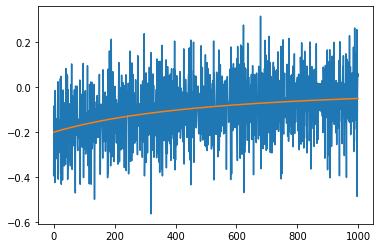

In [17]:
plt.plot(t[0:-1], diff_n(t, p,  1))
plt.plot(t[0:-1], pprime[0: -1])

200


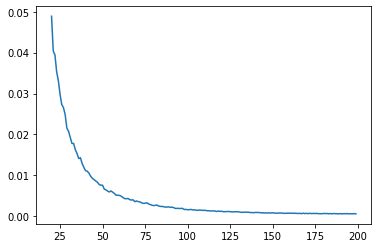

In [54]:
# вычислим среднеквадратичную ошибку

begin = 20
end = 200

msq = np.zeros(end)

for i in range(begin, end):
  # print(i, diff_n(t, p, i).size, pprime[i//2:-i//2].size)
  msq[i] = np.sum((diff_n(t, p, i) - pprime[i//2:-i//2]) ** 2)

print(msq.size)
plt.plot(np.arange(begin, end), msq[begin:])

### Задание 2

In [27]:
5//2, 6//2

(2, 3)